# NAME: EMMANUEL INEGET
# COURSE NAME: DATA ANALYSIS AND PROCESS MINING 
# COURSE CODE: DSC8204
# COURSE FACILITATOR(S):  DR. DAPHINE NYACHAKI BITALO
# EXAM TYPE: PROJECT-BASED EXAM

# PART A -- Goal 3:  Process Mining in the Finance Sector.  [30 Marks] 

1. Event Data Preprocessing: 
    - a. Data Source:  You are provided with a dataset “financial_log.xes” which contains financial event logs 
    - b. Preprocess the dataset for further analyses. 

In [ ]:
# %pip install pm4py
# %pip install graphviz

In [ ]:
import pm4py as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pm4py.objects.conversion.log import converter as log_converter

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.evaluation.replay_fitness import algorithm as fitness_evaluator

from pm4py.algo.discovery.alpha import algorithm as alpha_miner

from pm4py.algo.evaluation.replay_fitness import algorithm as fitness_evaluator

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the XES file
financial_log = pm.read_xes('financial_log.xes')

# Display the first few rows of the dataframe
financial_log.head(5)

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:07<00:00, 1794.31it/s]


,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000


In [ ]:
# Discuss the frequency of the event logs
event_frequency = financial_log['concept:name'].value_counts()
print("Event Frequencies:\n", event_frequency)

Event Frequencies:
 concept:name
W_Completeren aanvraag            54850
W_Nabellen offertes               52016
W_Nabellen incomplete dossiers    25190
W_Valideren aanvraag              20809
W_Afhandelen leads                16566
A_SUBMITTED                       13087
A_PARTLYSUBMITTED                 13087
A_DECLINED                         7635
A_PREACCEPTED                      7367
O_SENT                             7030
O_CREATED                          7030
O_SELECTED                         7030
A_ACCEPTED                         5113
A_FINALIZED                        5015
O_CANCELLED                        3655
O_SENT_BACK                        3454
A_CANCELLED                        2807
A_ACTIVATED                        2246
A_APPROVED                         2246
A_REGISTERED                       2246
O_ACCEPTED                         2243
O_DECLINED                          802
W_Beoordelen fraude                 664
W_Wijzigen contractgegevens          12
Name: c

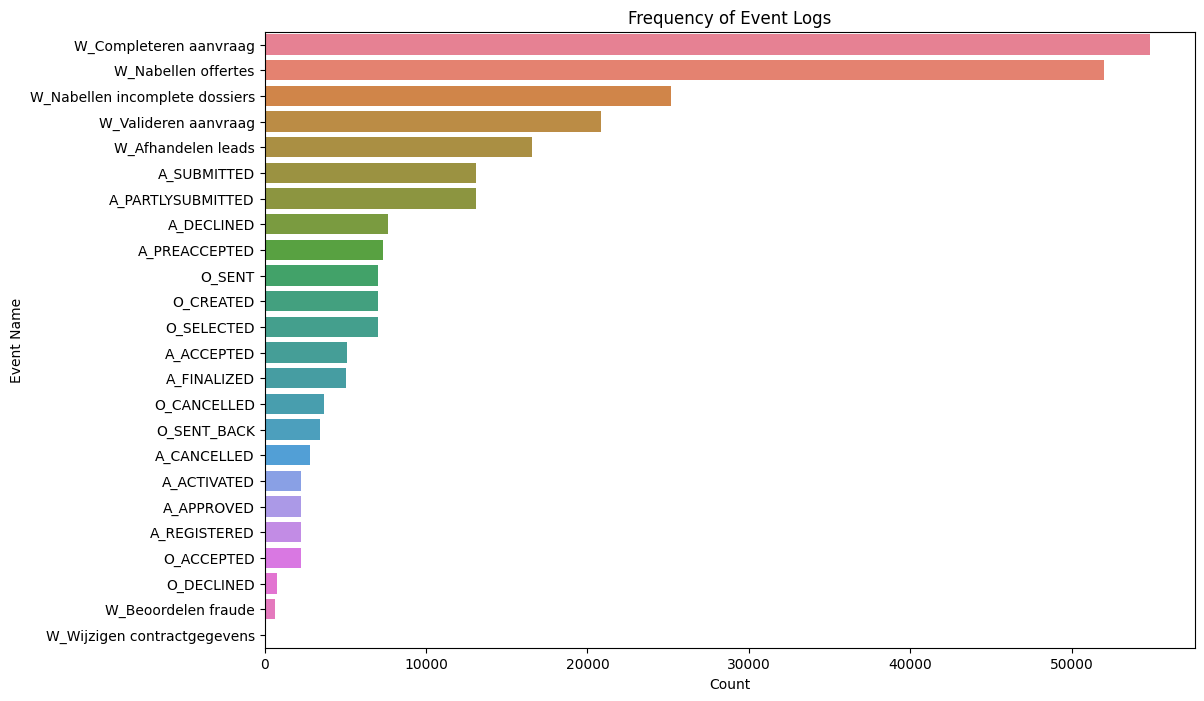

In [ ]:
# Visualize the frequency of events
plt.figure(figsize=(12, 8))

# Define a custom color palette with different colors
custom_palette = sns.color_palette('husl', n_colors=len(financial_log['concept:name'].unique()))

# Plot the countplot with hue and custom palette
sns.countplot(y='concept:name', data=financial_log, order=financial_log['concept:name'].value_counts().index,
              palette=custom_palette)

# Set the default font size for the labels
# plt.rcParams['font.size'] = 8

plt.title('Frequency of Event Logs')
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.show()

In [ ]:
# Identify missing values for all variables
missing_values = financial_log.isnull().sum()
print("Missing Values for Each Variable:\n", missing_values)

Missing Values for Each Variable:
 org:resource            18010
lifecycle:transition        0
concept:name                0
time:timestamp              0
case:REG_DATE               0
case:concept:name           0
case:AMOUNT_REQ             0
dtype: int64


In [ ]:
missing_resource = financial_log['org:resource'].isnull().sum()

missing_percentage = (missing_resource / len(financial_log)) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Percentage of missing values: 6.87%


In [ ]:
# View data type of the varaibale
print(financial_log['org:resource'].dtype)

object


In [ ]:
# Impute missing values with the most common resource [Mode] since it is a categorical variable
most_common_resource = financial_log['org:resource'].mode()[0]
financial_log['org:resource'].fillna(most_common_resource, inplace=True)

In [ ]:
# Identify missing values
missing_resource = financial_log['org:resource'].isnull().sum()
print(f"Number of missing values in 'org:resource': {missing_resource}")

Number of missing values in 'org:resource': 0


In [ ]:
financial_log

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
4,112,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
...,...,...,...,...,...,...,...
262195,112,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000
262196,112,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000
262197,11169,START,W_Afhandelen leads,2012-03-01 09:26:46.736000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000
262198,11169,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118000+00:00,2012-02-29 23:51:16.799000+00:00,214376,15000


In [ ]:
start_events = financial_log[financial_log['concept:name'] == "O_CREATED"]
start_events

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
8,10862,COMPLETE,O_CREATED,2011-10-01 11:45:11.197000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
36,10862,COMPLETE,O_CREATED,2011-10-01 14:35:47.488000+00:00,2011-10-01 08:08:58.256000+00:00,173691,5000
45,11120,COMPLETE,O_CREATED,2011-10-03 16:56:19.613000+00:00,2011-10-01 08:08:58.256000+00:00,173691,5000
79,11201,COMPLETE,O_CREATED,2011-10-03 13:40:15.605000+00:00,2011-10-01 08:10:30.287000+00:00,173694,7000
86,11201,COMPLETE,O_CREATED,2011-10-03 13:44:19.671000+00:00,2011-10-01 08:10:30.287000+00:00,173694,7000
...,...,...,...,...,...,...,...
262105,11299,COMPLETE,O_CREATED,2012-03-01 17:03:42.263000+00:00,2012-02-29 22:43:26.064000+00:00,214358,3500
262121,10982,COMPLETE,O_CREATED,2012-03-01 18:27:04.119000+00:00,2012-02-29 23:11:37.974000+00:00,214361,5000
262149,11003,COMPLETE,O_CREATED,2012-03-02 10:10:05.820000+00:00,2012-02-29 23:22:24.570000+00:00,214364,5000
262156,11003,COMPLETE,O_CREATED,2012-03-02 10:14:43.263000+00:00,2012-02-29 23:22:24.570000+00:00,214364,5000


In [ ]:
end_events = financial_log[financial_log['concept:name'].isin(["A_FINALIZED", "A_DECLINED", "O_CANCELLED", "A_ACCEPTED"])]
end_events


,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
5,10862,COMPLETE,A_ACCEPTED,2011-10-01 11:42:43.308000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
7,10862,COMPLETE,A_FINALIZED,2011-10-01 11:45:09.243000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
33,10862,COMPLETE,A_ACCEPTED,2011-10-01 14:33:54.614000+00:00,2011-10-01 08:08:58.256000+00:00,173691,5000
34,10862,COMPLETE,A_FINALIZED,2011-10-01 14:35:46.016000+00:00,2011-10-01 08:08:58.256000+00:00,173691,5000
44,11120,COMPLETE,O_CANCELLED,2011-10-03 16:56:17.731000+00:00,2011-10-01 08:08:58.256000+00:00,173691,5000
...,...,...,...,...,...,...,...
262170,112,COMPLETE,A_DECLINED,2012-02-29 23:29:21.958000+00:00,2012-02-29 23:28:41.098000+00:00,214367,500
262175,11169,COMPLETE,A_DECLINED,2012-03-01 09:28:18.168000+00:00,2012-02-29 23:28:55.349000+00:00,214370,20000
262185,10933,COMPLETE,A_ACCEPTED,2012-03-01 20:17:22.457000+00:00,2012-02-29 23:43:09.766000+00:00,214373,8500
262187,10933,COMPLETE,A_FINALIZED,2012-03-01 20:22:38.593000+00:00,2012-02-29 23:43:09.766000+00:00,214373,8500


In [ ]:
# Save DataFrame to CSV file
financial_log.to_csv('financial_log.csv', index=False)

print("Travel log saved successfully as 'financial_log.csv'")

Travel log saved successfully as 'financial_log.csv'


2. Event Logs Exploration: 
    - a. Explore the financial logs to highlight the distribution start, end, and variant events/activities. 
    - b. Generate visuals highlighting the distribution of events/activity occurrences

In [ ]:
# Load processsed financial_log data
financial_logs_processed = pd.read_csv("financial_log.csv") 
financial_logs_processed.head()

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
4,112,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000


In [ ]:
financial_logs_processed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262200 entries, 0 to 262199
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   org:resource          262200 non-null  int64 
 1   lifecycle:transition  262200 non-null  object
 2   concept:name          262200 non-null  object
 3   time:timestamp        262200 non-null  object
 4   case:REG_DATE         262200 non-null  object
 5   case:concept:name     262200 non-null  int64 
 6   case:AMOUNT_REQ       262200 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 14.0+ MB


In [ ]:
financial_logs_processed.isnull().sum()


org:resource            0
lifecycle:transition    0
concept:name            0
time:timestamp          0
case:REG_DATE           0
case:concept:name       0
case:AMOUNT_REQ         0
dtype: int64

In [ ]:
# Convert the 'time:timestamp' column to datetime format
financial_logs_processed['time:timestamp'] = pd.to_datetime(financial_logs_processed['time:timestamp'], errors='coerce')


In [ ]:
# Identifying start and end of distribution
financial_logs_processed['time:timestamp'] = pd.to_datetime(financial_logs_processed['time:timestamp'], format='mixed')
start_time = financial_logs_processed['time:timestamp'].min()
end_time = financial_logs_processed['time:timestamp'].max()

print("Start of Distribution:", start_time)
print("End of Distribution:", end_time)


Start of Distribution: 2011-10-01 00:38:44.546000+00:00
End of Distribution: 2012-03-14 16:04:54.681000+00:00


In [ ]:
# exploring the distribution of these transitions
transition_counts = financial_logs_processed['lifecycle:transition'].value_counts()
transition_counts


lifecycle:transition
COMPLETE    164506
START        71376
SCHEDULE     26318
Name: count, dtype: int64

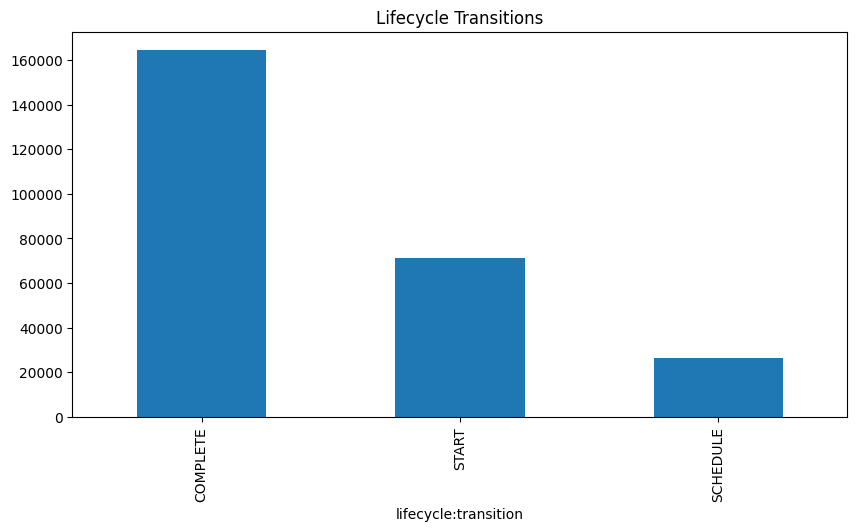

In [ ]:
# Visualizing the transition distribution.
transition_counts.plot(kind='bar', figsize=(10,5), title="Lifecycle Transitions")
plt.show()

In [ ]:
# Analyzing case:AMOUNT_REQ (Financial Request Amount)
financial_logs_processed['case:AMOUNT_REQ'].describe()

count    262200.000000
mean      15586.795381
std       12381.430915
min           0.000000
25%        6500.000000
50%       11000.000000
75%       20000.000000
max       99999.000000
Name: case:AMOUNT_REQ, dtype: float64

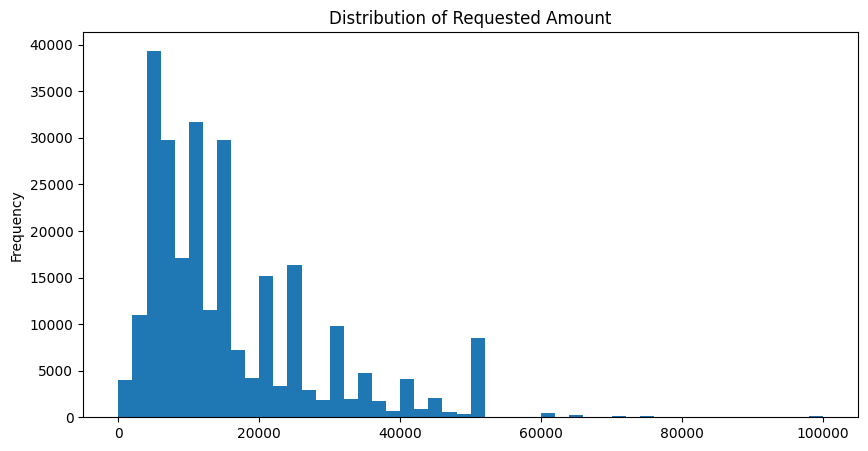

In [ ]:
# Plotting the distribution (histogram).
financial_logs_processed['case:AMOUNT_REQ'].plot(kind='hist', bins=50, figsize=(10,5), title="Distribution of Requested Amount")
plt.show()


case:concept:name
173688    26
173691    39
173694    59
173697     3
173700     3
Name: lifecycle:transition, dtype: int64


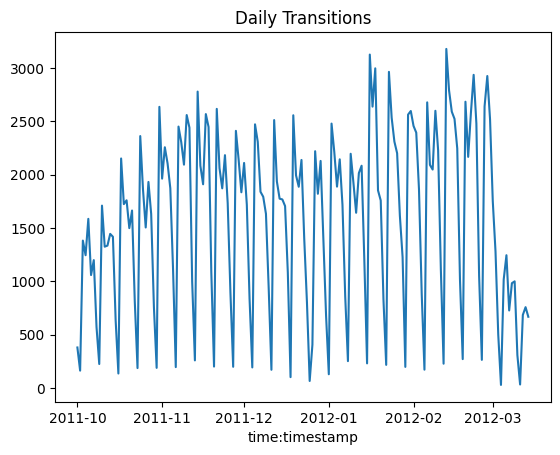

In [ ]:
# Investigating case and concept relationships
case_counts = financial_logs_processed.groupby('case:concept:name')['lifecycle:transition'].count()
print(case_counts.head())

# Time series of transitions for a specific case concept
financial_logs_processed.groupby(financial_logs_processed['time:timestamp'].dt.date)['lifecycle:transition'].count().plot(title="Daily Transitions")
plt.show()


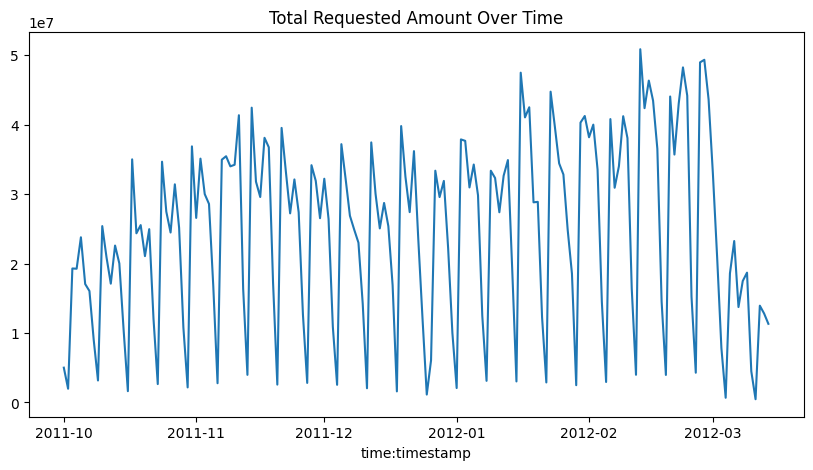

In [ ]:
# Exploring financial request amount over time
financial_logs_processed.groupby(financial_logs_processed['time:timestamp'].dt.date)['case:AMOUNT_REQ'].sum().plot(figsize=(10,5), title="Total Requested Amount Over Time")
plt.show()


3. Build and Evaluate Process Mining Models: 
    - a. Use suitable algorithms to discover the process map/flow that exists within the financial logs 
    - b. Check the quality of  the process models generated above.

In [ ]:
# Ensuring timestamps are in the correct format
financial_logs_processed['time:timestamp'] = pd.to_datetime(financial_logs_processed['time:timestamp'])

# Converting DataFrame to PM4Py Event Log
event_log_pm4py = log_converter.apply(financial_logs_processed, variant=log_converter.Variants.TO_EVENT_LOG)

In [ ]:
# Convert DataFrame to PM4Py Event Log
event_log_pm4py = log_converter.apply(financial_logs_processed, variant=log_converter.Variants.TO_EVENT_LOG)

In [ ]:
dfg_result = dfg_discovery.apply(event_log_pm4py)
print(type(dfg_result))
print(dfg_result)


<class 'collections.Counter'>
Counter({('W_Completeren aanvraag', 'W_Completeren aanvraag'): 38004, ('W_Nabellen offertes', 'W_Nabellen offertes'): 36084, ('W_Nabellen incomplete dossiers', 'W_Nabellen incomplete dossiers'): 18475, ('A_SUBMITTED', 'A_PARTLYSUBMITTED'): 13087, ('A_PREACCEPTED', 'W_Completeren aanvraag'): 7367, ('O_CREATED', 'O_SENT'): 7030, ('W_Afhandelen leads', 'W_Afhandelen leads'): 6992, ('O_SENT', 'W_Nabellen offertes'): 6633, ('W_Valideren aanvraag', 'W_Nabellen incomplete dossiers'): 5911, ('W_Valideren aanvraag', 'W_Valideren aanvraag'): 5849, ('W_Nabellen incomplete dossiers', 'W_Valideren aanvraag'): 5459, ('W_Completeren aanvraag', 'A_ACCEPTED'): 5113, ('W_Nabellen offertes', 'W_Completeren aanvraag'): 5018, ('W_Completeren aanvraag', 'W_Nabellen offertes'): 5015, ('A_PARTLYSUBMITTED', 'A_PREACCEPTED'): 4852, ('A_PARTLYSUBMITTED', 'W_Afhandelen leads'): 4739, ('O_SENT_BACK', 'W_Valideren aanvraag'): 3454, ('A_PARTLYSUBMITTED', 'A_DECLINED'): 3429, ('W_Valider

In [ ]:
# Generate a HeuristicsNet
result = heuristics_miner.apply(event_log_pm4py)

# Check the result
print(type(result))
print(len(result))


<class 'tuple'>
3


In [ ]:
print(type(result[0]))  # Check the type of the returned HeuristicsNet


<class 'pm4py.objects.petri_net.obj.PetriNet'>


there is need to install Graphiz from: https://graphviz.org/download/

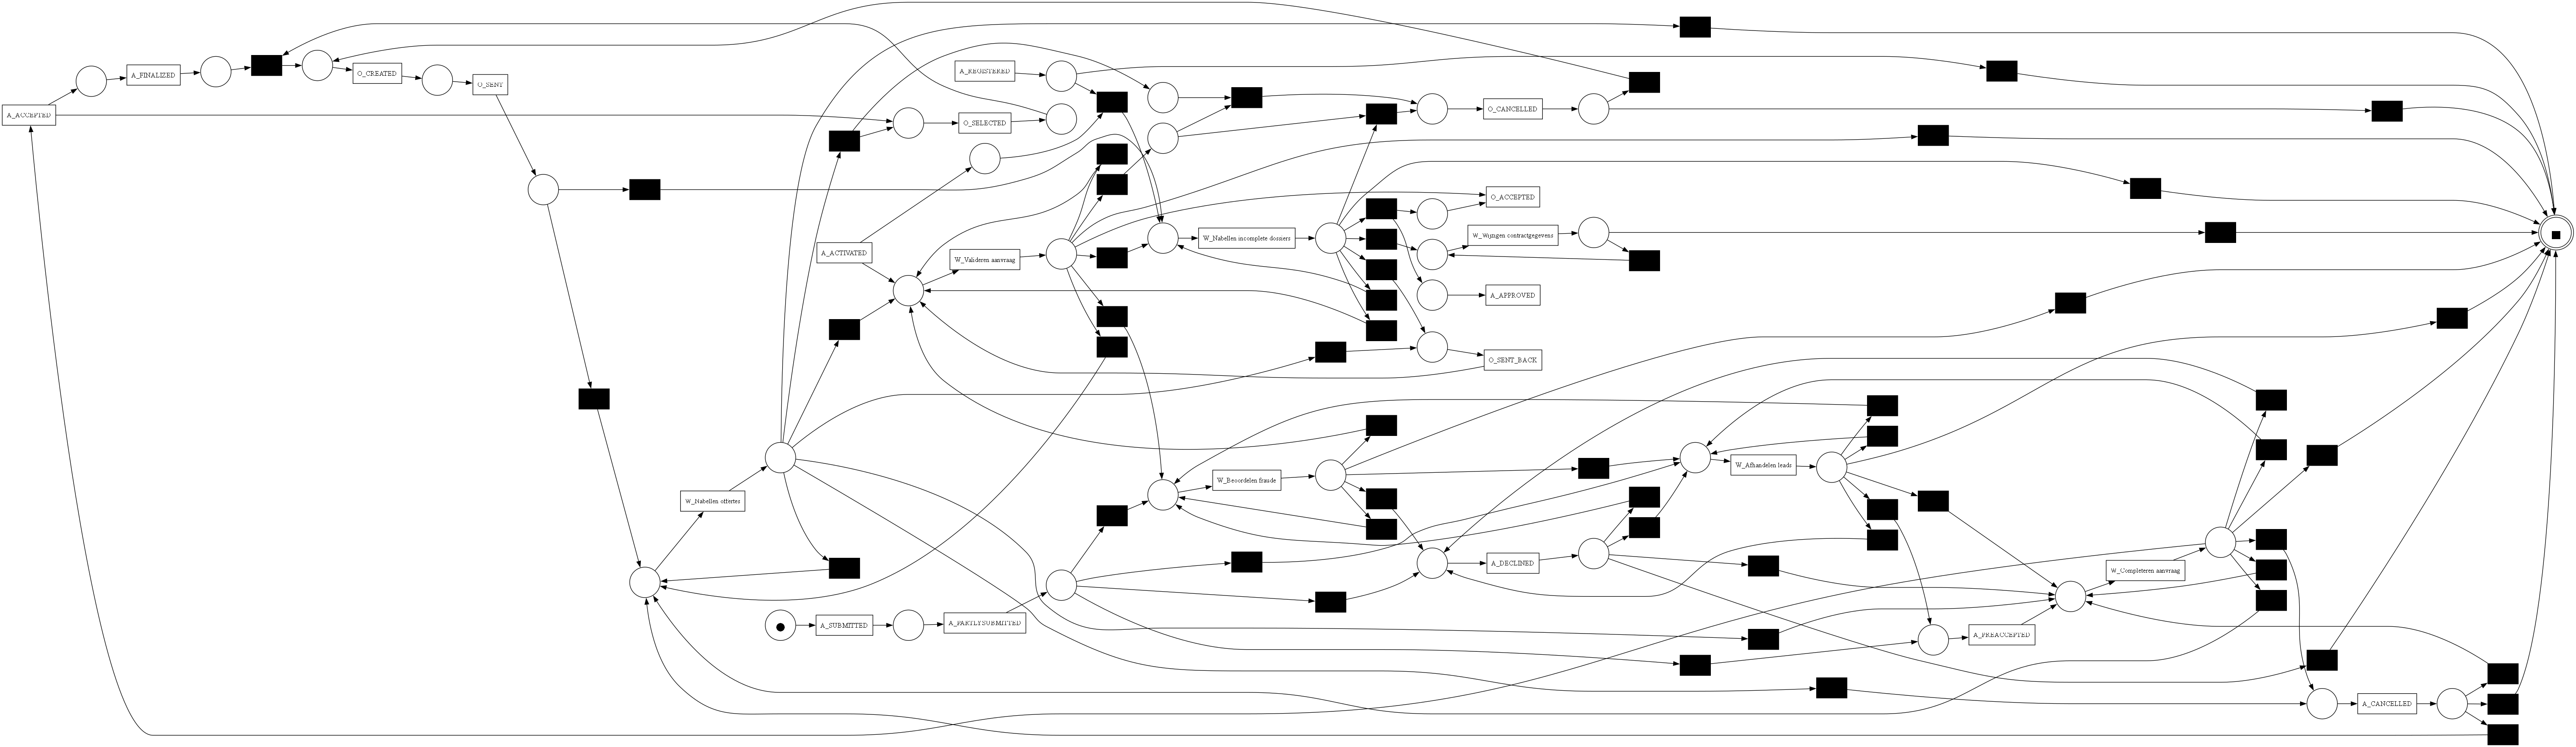

In [ ]:
# Visualize the HeuristicsNet
# Generate the PetriNet (this uses the apply function which returns a PetriNet)
petri_net, initial_marking, final_marking = heuristics_miner.apply(event_log_pm4py)

# Visualize the PetriNet
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)

# Save the visualization as an image
pn_visualizer.save(gviz, "petri_net.png")

# Optionally, display the graph inline
pn_visualizer.view(gviz)

##### Evaluating the model

In [ ]:
# Using Alpha Miner to discover a Petri Net
net, initial_marking, final_marking = alpha_miner.apply(event_log_pm4py)

In [ ]:
# Know the parameters of the Petri Net
help(fitness_evaluator.evaluate)


Help on function evaluate in module pm4py.algo.evaluation.replay_fitness.algorithm:

evaluate(results, parameters=None, variant=<Variants.TOKEN_BASED: <module 'pm4py.algo.evaluation.replay_fitness.variants.token_replay' from 'c:\\Users\\MIS-TW\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\pm4py\\algo\\evaluation\\replay_fitness\\variants\\token_replay.py'>>)
    Evaluate replay results when the replay algorithm has already been applied

    Parameters
    -----------
    results
        Results of the replay algorithm
    parameters
        Possible parameters passed to the evaluation
    variant
        Indicates which evaluator is called

    Returns
    -----------
    fitness_eval
        Fitness evaluation



In [ ]:
# Perform token-based replay
replay_results = token_replay.apply(event_log_pm4py, net, initial_marking, final_marking)

# Evaluate fitness based on the replay results
fitness = fitness_evaluator.evaluate(replay_results)
print("Fitness:", fitness["log_fitness"])


replaying log with TBR, completed traces :: 100%|██████████| 4366/4366 [00:05<00:00, 738.00it/s]

Fitness: 0.5586479208127507


In [ ]:
print("Log Fitness:", fitness["log_fitness"])
print("Average Trace Fitness:", fitness["average_trace_fitness"])
print("Percentage of Fitting Traces:", fitness["perc_fit_traces"])


Log Fitness: 0.5586479208127507
Average Trace Fitness: 0.6546702831242823
Percentage of Fitting Traces: 0.0


The outcome of the process model analysis identifies areas of improvement. The Log Fitness value stands at 0.56, which means that the model captures a modest percentage of the behavior in the event log but still has a significant gap with the model and the actual process. The Average Trace Fitness of 0.65 shows that, on average, the individual traces in the event log are quite well-represented in the model, but there is some room for more alignment. The worst result is the Percentage of Fitting Traces, 0.0%, which means none of the traces in the event log completely fit the process model. This is a sign of an issue with the generalizability of the model to the traces in the event log, and that the model requires further refinement to achieve higher accuracy and robustness.